In [13]:
#libraries And auxiliary Variables

import pandas as pd
import numpy as np

import matplotlib_inline as plt




data_path = "falcon_9_cleaned_data.csv"

# OLD

### Understand the Data Structure

In [2]:
#understand the Data Structure

dataset = pd.read_csv(data_path)


##### Assessing the Dataset's size, types, and format

In [9]:
dataset.dtypes

FlightNumber        int64
date               object
BoosterVersion     object
PayloadMass       float64
LaunchSite         object
Latitude          float64
Longitude         float64
Orbit              object
Flights           float64
Reused               bool
GridFins             bool
Legs                 bool
LandingPad         object
ReusedCount       float64
Serial             object
Block             float64
Outcome            object
dtype: object

In [25]:
dataset.shape

(167, 17)

In [26]:
dataset.isnull().sum()

FlightNumber       0
date               0
BoosterVersion     0
PayloadMass        0
LaunchSite         0
Latitude           0
Longitude          0
Orbit              0
Flights            0
Reused             0
GridFins           0
Legs               0
LandingPad        26
ReusedCount        0
Serial             0
Block              0
Outcome            0
dtype: int64

In [27]:
dataset.head(n=1) #sample

,FlightNumber,date,BoosterVersion,PayloadMass,LaunchSite,Latitude,Longitude,Orbit,Flights,Reused,GridFins,Legs,LandingPad,ReusedCount,Serial,Block,Outcome
0,1,2010-06-04,Falcon 9,8183.607718,CCSFS SLC 40,28.561857,-80.577366,LEO,1.0,False,False,False,NaN,0.0,B0003,1.0,None None


In [32]:
# Unique values in the DataSet

print(dataset['BoosterVersion'].unique())

print("\n\n\n\n")

print(dataset['LaunchSite'].unique())

print("\n\n\n\n")

print(dataset['Orbit'].unique())

print("\n\n\n\n")

print(dataset['Outcome'].unique())

print("\n\n\n\n")

print(dataset['LandingPad'].unique())

print("\n\n\n\n")

['Falcon 9']





['CCSFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']





['LEO' 'ISS' 'PO' 'GTO' 'ES-L1' 'SSO' 'HEO' 'MEO' 'VLEO' 'SO' 'GEO' 'TLI']





['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']





[nan '5e9e3032383ecb761634e7cb' '5e9e3032383ecb6bb234e7ca'
 '5e9e3032383ecb267a34e7c7' '5e9e3033383ecbb9e534e7cc'
 '5e9e3032383ecb554034e7c9' '5e9e3033383ecb075134e7cd']







In [ ]:
dataset['PayloadMass'].describe()


#Meaning:
#   average weight in kg    : ~8200 Kg
#   Max noted capacity      :  15600 kg
#   Min used Capacity       :  330 Kg


count      167.000000
mean      8190.139593
std       5160.288058
min        330.000000
25%       3414.000000
50%       8183.607718
75%      13260.000000
max      15600.000000
Name: PayloadMass, dtype: float64

In [ ]:
dataset['ReusedCount'].describe()

# takeaway:
#   a Falcon-9 Booster is (on average) is used 11 out of 20 times
#   maximum, it is Used 13 times

count    167.000000
mean       5.502994
std        4.695389
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max       13.000000
Name: ReusedCount, dtype: float64

In [53]:
gridfins_Value_count = dataset['GridFins'].value_counts()

gridfins_true_percentage = dataset['GridFins'].value_counts()/gridfins_Value_count.sum()
print(gridfins_true_percentage.round(2) * 100)


# Gridfins are Used 88% of the times


GridFins
True     88.0
False    12.0
Name: count, dtype: float64


# NEW

In [15]:
#libraries And auxiliary Variables

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium



data_path = "falcon_9_cleaned_data.csv"

In [6]:

#understand the Data Structure

dataset = pd.read_csv(data_path)


In [7]:
#datatypes

dataset.dtypes

FlightNumber        int64
date               object
BoosterVersion     object
PayloadMass       float64
LaunchSite         object
Latitude          float64
Longitude         float64
Orbit              object
Flights           float64
Reused               bool
GridFins             bool
Legs                 bool
LandingPad         object
ReusedCount       float64
Serial             object
Block             float64
Outcome            object
dtype: object

In [8]:
# exploring numerical datatype

dataset.select_dtypes(include="number")

,FlightNumber,PayloadMass,Latitude,Longitude,Flights,ReusedCount,Block
0,1,8183.607718,28.561857,-80.577366,1.0,0.0,1.0
1,2,525.000000,28.561857,-80.577366,1.0,0.0,1.0
2,3,677.000000,28.561857,-80.577366,1.0,0.0,1.0
3,4,500.000000,34.632093,-120.610829,1.0,0.0,1.0
4,5,3170.000000,28.561857,-80.577366,1.0,0.0,1.0
...,...,...,...,...,...,...,...
162,164,13260.000000,28.608058,-80.603956,2.0,1.0,5.0
163,165,13260.000000,34.632093,-120.610829,7.0,6.0,5.0
164,166,13260.000000,28.561857,-80.577366,6.0,5.0,5.0
165,167,13260.000000,28.561857,-80.577366,4.0,0.0,5.0


In [9]:
#exploring Boolean Data

dataset.select_dtypes(include="boolean")

,Reused,GridFins,Legs
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
162,True,True,True
163,True,True,True
164,True,True,True
165,True,True,True


In [10]:
#exploring Categorical Data

dataset.select_dtypes(include="object")

,date,BoosterVersion,LaunchSite,Orbit,LandingPad,Serial,Outcome
0,2010-06-04,Falcon 9,CCSFS SLC 40,LEO,NaN,B0003,None None
1,2012-05-22,Falcon 9,CCSFS SLC 40,LEO,NaN,B0005,None None
2,2013-03-01,Falcon 9,CCSFS SLC 40,ISS,NaN,B0007,None None
3,2013-09-29,Falcon 9,VAFB SLC 4E,PO,NaN,B1003,False Ocean
4,2013-12-03,Falcon 9,CCSFS SLC 40,GTO,NaN,B1004,None None
...,...,...,...,...,...,...,...
162,2022-08-28,Falcon 9,KSC LC 39A,VLEO,5e9e3033383ecb075134e7cd,B1069,True ASDS
163,2022-08-31,Falcon 9,VAFB SLC 4E,VLEO,5e9e3032383ecb6bb234e7ca,B1063,True ASDS
164,2022-09-17,Falcon 9,CCSFS SLC 40,VLEO,5e9e3033383ecbb9e534e7cc,B1067,True ASDS
165,2022-09-24,Falcon 9,CCSFS SLC 40,VLEO,5e9e3033383ecbb9e534e7cc,B1072,True ASDS


### summary Statistics

In [11]:
dataset.select_dtypes(include="number").describe()

,FlightNumber,PayloadMass,Latitude,Longitude,Flights,ReusedCount,Block
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,84.431138,8190.139593,29.520203,-86.817763,3.724551,5.502994,4.191617
std,48.779622,5160.288058,2.201816,14.554894,3.249958,4.695389,1.388134
min,1.000000,330.000000,28.561857,-120.610829,1.000000,0.000000,1.000000
25%,42.500000,3414.000000,28.561857,-80.603956,1.000000,1.000000,4.000000
50%,84.000000,8183.607718,28.561857,-80.577366,2.000000,5.000000,5.000000
75%,126.500000,13260.000000,28.608058,-80.577366,5.500000,9.000000,5.000000
max,168.000000,15600.000000,34.632093,-80.577366,13.000000,13.000000,5.000000


Text(0.5, 1.0, 'Payload Data Distribution')

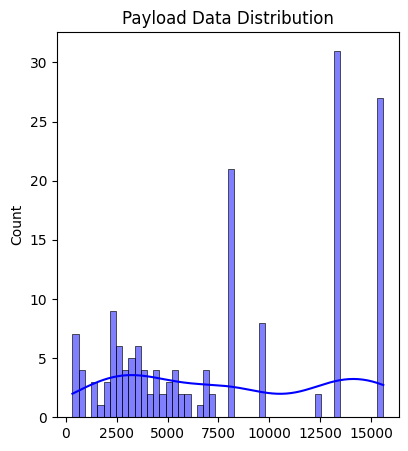

In [16]:
payload_mass_list = dataset['PayloadMass'].to_list()


plt.figure(figsize=(15, 5))

# Positively Skewed Plot
plt.subplot(1, 3, 1)
sns.histplot(payload_mass_list, kde=True, color="blue", bins= 50)
plt.title('Payload Data Distribution')



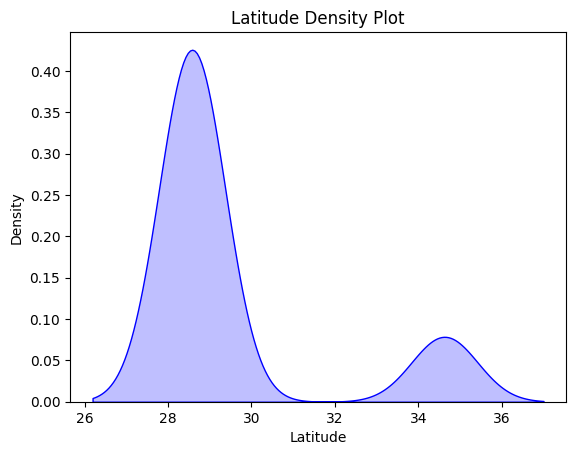

In [17]:
latitude_list = dataset['Latitude'].to_list()
longitude_list= dataset['Longitude'].to_list()




#Density Plot (Kernel Density Estimate)
plt.subplot(1, 1, 1)
sns.kdeplot(latitude_list, fill=True, color='blue')
plt.title("Latitude Density Plot")
plt.xlabel("Latitude")
plt.ylabel("Density")


plt.show()

In [27]:

import folium
unique_coord = list(set(zip(latitude_list, longitude_list)))

geo_map = folium.Map(
    location= [np.mean(latitude_list), np.mean(longitude_list)],
    zoom_start=3
    )

for lat, lon in unique_coord:
    folium.Marker([lat, lon]).add_to(geo_map)


geo_map